In [1]:
from pynq import Overlay
from pynq.lib.iic import *
from ov5640_config import *
from pynq.lib.video import *
from time import sleep
import dma
import os
import shutil
import numpy as np
import cv2

cv_ov5640 = Overlay("/home/xilinx/jupyter_notebooks/Myov5640/myov5640.bit")
iic = AxiIIC(cv_ov5640.ip_dict['axi_iic_0'])

address = 0x3c
length = 3
for config in ov5640_config:
    tmp1 = config[0] >> 8
    tmp2 = config[0] & 0xff
    print(tmp1)
    iic.send(address, bytes([tmp1, tmp2, config[1]]), length)

print('send finished')
bayer2rgb = cv_ov5640.v_demosaic_0
bayer2rgb.write(0x10, 1280)
bayer2rgb.write(0x18, 720)
bayer2rgb.write(0x28, 1)
bayer2rgb.write(0x00, 0x81)

otsu = cv_ov5640.image_processing.hls_otsu_0
otsu.write(0x10, 720)
otsu.write(0x18, 1280)
otsu.write(0x00, 0x81)

myflow = cv_ov5640.image_processing.my_workflow_0
myflow.write(0x10, 720)
myflow.write(0x18, 1280)
myflow.write(0x00, 0x81)

adath = cv_ov5640.image_processing.my_adathreshold_0
adath.write(0x10, 720)
adath.write(0x18, 1280)
adath.write(0x20, 30)
adath.write(0x00, 0x81)

switch0 = cv_ov5640.image_processing.axis_interconnect_0.xbar
switch1 = cv_ov5640.image_processing.axis_interconnect_1.xbar
def switch_stream(switch0, switch1, Index):
    MaxIndex = 5
    switch0.write(0x00, ~0x02)
    for i in range(0,MaxIndex + 1):
        switch0.write(0x40 + 4*Index, 0x80000000)
    switch0.write(0x40 + 4*Index, 0)
    switch0.write(0x00, 0x02)

    switch1.write(0x00, ~0x02)
    for i in range(0,MaxIndex + 1):
        switch0.write(0x40 + 4*Index, 0x80000000)
    switch1.write(0x40 + 4*0, Index)
    switch1.write(0x00, 0x02)
    
switch_stream(switch0, switch1, 0)
vdma0 = cv_ov5640.axi_vdma_0
vdma1 = cv_ov5640.axi_vdma_1
vdma0.writechannel.mode = VideoMode(1280, 720, 24)
vdma1.readchannel.mode = vdma0.writechannel.mode
vdma0.readchannel.mode = vdma0.writechannel.mode
vdma1.writechannel.mode = vdma0.writechannel.mode
vdma0.readchannel.tie(vdma0.writechannel)
vdma1.readchannel.tie(vdma1.writechannel)
vdma0.writechannel.start()
vdma0.readchannel.start()
vdma1.writechannel.start()
vdma1.readchannel.start()

49
48
48
49
48
48
48
48
49
54
54
54
54
54
55
55
55
55
55
55
57
57
57
55
54
54
48
54
55
71
58
58
58
54
54
54
54
60
60
60
60
60
60
60
60
60
56
56
56
55
64
64
48
48
48
48
67
80
68
80
58
58
58
58
58
58
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
83
83
83
83
83
83
83
83
83
83
83
85
85
85
85
85
85
80
83
83
83
83
83
83
83
83
83
83
83
83
80
48
48
48
60
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
54
54
55
55
58
58
58
58
64
48
48
71
68
70
70
72
56
80
53
59
59
send finished


In [45]:
from PIL import Image
import IPython
import numpy as np

eye_img = np.zeros(shape=(90, 160, 1), dtype=np.uint8)

def myellipse(delta_x, delta_y):
    delta_x = delta_x / 8
    delta_y = delta_y / 8
    img = 255 * np.ones((90, 160, 3), np.uint8)  # img[0]为高度，img[1]为宽度
    ellipse_midx = 80
    ellipse_midy = 45
    ellipse_long = 78
    ellipse_short = 43
    rate = 0.9
    cv2.ellipse(img, (ellipse_midx, ellipse_midy), (ellipse_long, ellipse_short), 0, 0, 360, (0, 0, 0))
    if delta_x > 100:
        delta_x = 100
    elif delta_x < -100:
        delta_x = -100
    if delta_y > 50:
        delta_y = 50
    elif delta_y < -50:
        delta_y = -50
    delta_x = rate * delta_x + 80
    delta_y = rate * delta_y + 45
    cv2.circle(img, (int(delta_x), int(delta_y)), 5, (0, 0, 0))
    # 显示图像
    return img

In [44]:
switch_stream(switch0, switch1, 1)
sw2 = cv_ov5640.SW2
usart = cv_ov5640.axi_uartlite_0
adath.write(0x20, 50)

In [7]:
vdma1.readchannel.stop()

vdma1.readchannel.start()


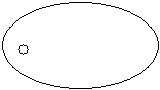

In [ ]:
cnt = 0
middlex = 0
middley = 0
direction = 0
average_x_point = [] 
x_point = []
average_y_point = []  
y_point = []
font = cv2.FONT_HERSHEY_SIMPLEX
while True:
    sw2_result = sw2.read(0x00)
    outframe = vdma1.readchannel.readframe()
    if not sw2_result:
        switch_stream(switch0, switch1, 0)
    else:
        switch_stream(switch0, switch1, 1)
        break
while True:
    adath.write(0x20, otsu.read(0x20)-50)
    outframe = vdma1.readchannel.readframe()
    frame_out = outframe[:,:,0]
    sum_x = np.sum(frame_out, axis=0)
    sum_y = np.sum(frame_out, axis=1) 
    max_x = sum_x.max()
    max_x_index = np.argmax(sum_x)
    max_y = sum_y.max()
    max_y_index = np.argmax(sum_y)
    if len(average_x_point) < 15:
        average_x_point.append(max_x)
    else:
        average_x_point.pop(0)
        average_x_point.append(max_x)
        x_point = list(filter(lambda x:x<max(average_x_point) and x > min(average_x_point),average_x_point))
        max_x = int(sum(x_point)/8)
    if len(average_y_point) < 15:
        average_y_point.append(max_y)
    else:
        average_y_point.pop(0)
        average_y_point.append(max_y)
        y_point = list(filter(lambda x:x<max(average_y_point) and x > min(average_y_point),average_y_point))
        max_y = int(sum(y_point)/8)   
    middlex = 640
    middley = 360
#     if cnt < 50:
#         cnt = cnt + 1
#         middlex = middlex + max_x_index
#         middley = middley + max_y_index
#     if cnt == 50:
#         middlex = middlex/50 
#         middley = middley/50
#         cnt = cnt + 1
#     if cnt == 51: 
    if cnt >= 0:
#         vdma1.readchannel.stop()
        cv2.putText(outframe,'middle x:'+ str(middlex), (20, 70), font, 1, (255, 255, 255), 2)
        cv2.putText(outframe,'middle y:'+ str(middley), (20, 100), font, 1, (255, 255, 255), 2)
        cv2.putText(outframe,'current x:'+ str(max_x_index), (20, 130), font, 1, (255, 255, 255), 2)
        cv2.putText(outframe,'current y:'+ str(max_y_index), (20, 160), font, 1, (255, 255, 255), 2) 
        cv2.circle(outframe, (int(middlex),int(middley)), 15, (255, 0, 0), 2)
        cv2.circle(outframe, (int(max_x_index),int(max_y_index)), 15, (0, 255, 255), 2)
        vdma1.writechannel.setframe(outframe)
        delta_x = max_x_index - middlex
        delat_y = max_y_index - middley
        if delta_x > 288:  # 向右
            usart.write(0x04, 0xaa)
            sleep(0.1)
            usart.write(0x04, 0x02)
            sleep(0.1)
            usart.write(0x04, 0x55)
            sleep(0.1)
        elif delta_x < -288:  # 向左
            usart.write(0x04, 0xaa)
            sleep(0.1)
            usart.write(0x04, 0x01)
            sleep(0.1)
            usart.write(0x04, 0x55)
            sleep(0.1)
        else:  # 中间           
            usart.write(0x04, 0xaa)
            sleep(0.1)
            usart.write(0x04, 0x00)
            sleep(0.1)
            usart.write(0x04, 0x55)
            sleep(0.1)
#         vdma1.readchannel.start()
#     print(cnt)
        image = Image.fromarray(myellipse(delta_x, delat_y))
        IPython.display.clear_output(1)
        display(image)

print(vdma1.writechannel.running)
print(vdma1.readchannel.running)

In [32]:
vdma0.writechannel.stop()
vdma0.readchannel.stop()
vdma1.writechannel.stop()
vdma1.readchannel.stop()